<a href="https://colab.research.google.com/github/Rohit1Chougule/Laptop_Price_Analysis/blob/main/UM_Laptop_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading of dataset
df = pd.read_csv("/content/laptop_prices.csv")
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


### Data Preprocessing

In [ ]:
df.size

29325

In [ ]:
df.shape

(1275, 23)

In [ ]:
1275 * 23

29325

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
pd.set_option('display.max_columns', None)  # to show all columns from ScreenW	...	RetinaDisplay
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,768,No,No,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [ ]:
df.sample(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
63,Asus,UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10),Notebook,14.0,8,Windows 10,1.40,941.00,Full HD,1920,1080,No,No,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
895,Toshiba,Portege X30-D-10V,Notebook,13.3,8,Windows 10,1.05,1475.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
1203,Dell,XPS 13,Ultrabook,13.3,16,Windows 10,1.20,2680.00,Quad HD+,3200,1800,Yes,No,No,Intel,2.7,Core i7 7500U,512,0,SSD,No,Intel,HD Graphics 620
202,Acer,Aspire E5-576G,Notebook,15.6,8,Windows 10,2.23,742.00,Full HD,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,1024,0,HDD,No,Nvidia,GeForce 940MX
38,HP,250 G6,Notebook,15.6,4,Windows 10,1.86,488.69,Standard,1366,768,No,No,No,Intel,2.5,Core i5 7200U,1024,0,HDD,No,Intel,HD Graphics 620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
# checking null values/ missing values
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
df.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1275


In [ ]:
# checking duplicates
df.duplicated().sum()

0

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1270,False
1271,False
1272,False
1273,False


In [ ]:
df.duplicated().value_counts()

,count
False,1275


In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

## Exploratory Data Analysis

#### Univariate Feature Analysis

<Axes: xlabel='Company'>

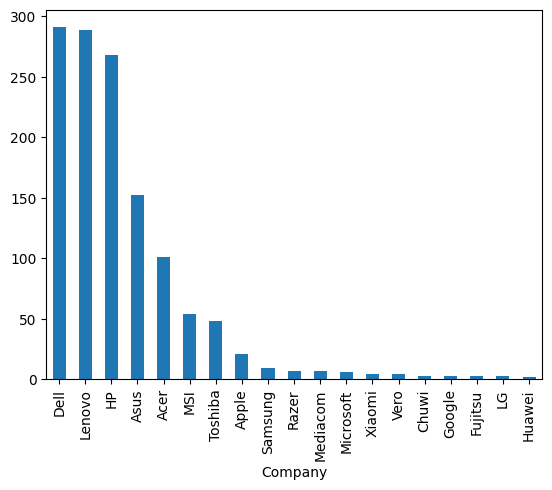

In [ ]:
# Company
df['Company'].value_counts().plot(kind='bar')

<Axes: ylabel='Company'>

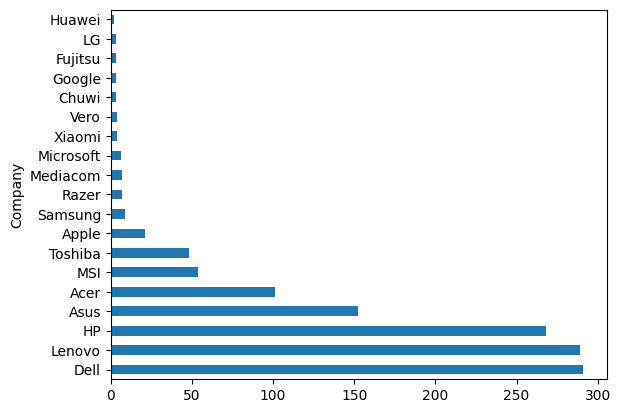

In [ ]:
# Company H
df['Company'].value_counts().plot(kind='barh')

<Axes: ylabel='Company'>

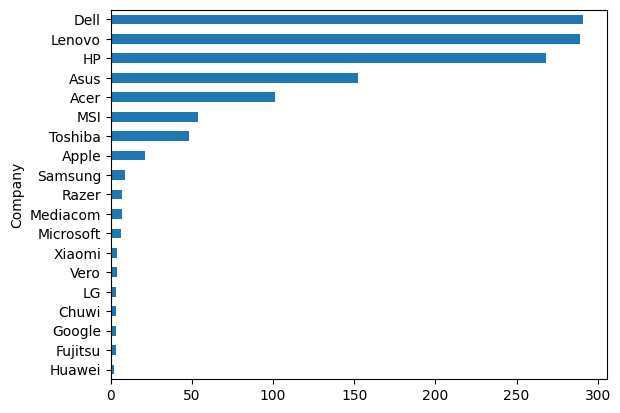

In [ ]:
# Company Horizontal & asc order
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh')

<Axes: ylabel='Product'>

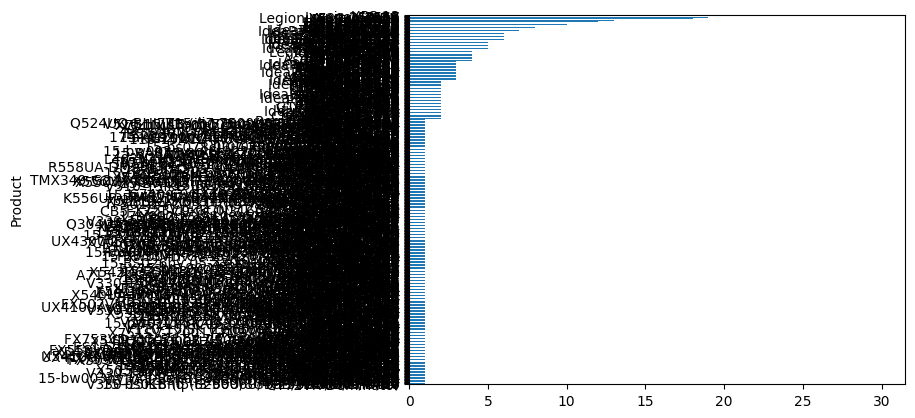

In [ ]:
# Product
df['Product'].value_counts().sort_values(ascending=True).plot(kind='barh')

<Axes: ylabel='Product'>

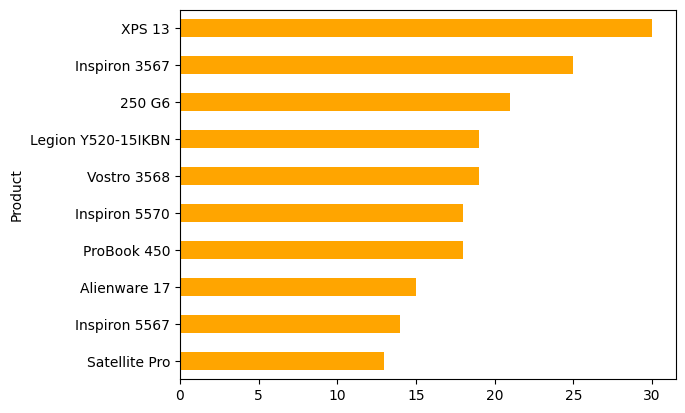

In [ ]:
# Product
P10_df=df['Product'].value_counts().nlargest(10)
P10_df.sort_values(ascending=True).plot(kind='barh', color ='orange')


<Axes: xlabel='OS'>

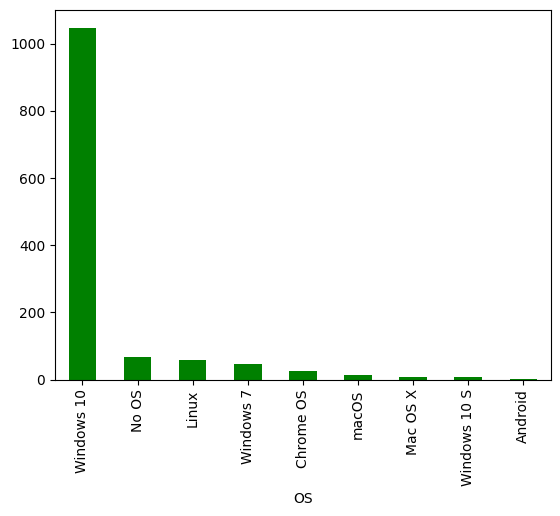

In [ ]:
# OS
df['OS'].value_counts().sort_values(ascending=False).plot(kind='bar',color = 'green')

<Axes: title={'center': 'Touchscreen'}, ylabel='count'>

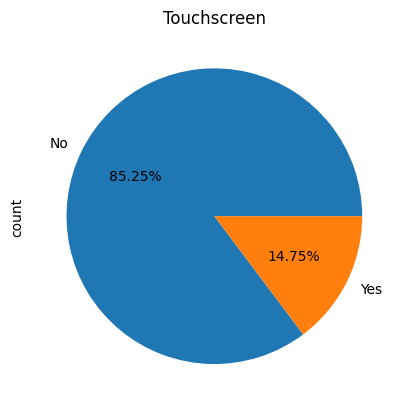

In [ ]:
#Touchscreen
df['Touchscreen'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'Touchscreen')

<Axes: title={'center': 'Touchscreen'}, xlabel='Touchscreen'>

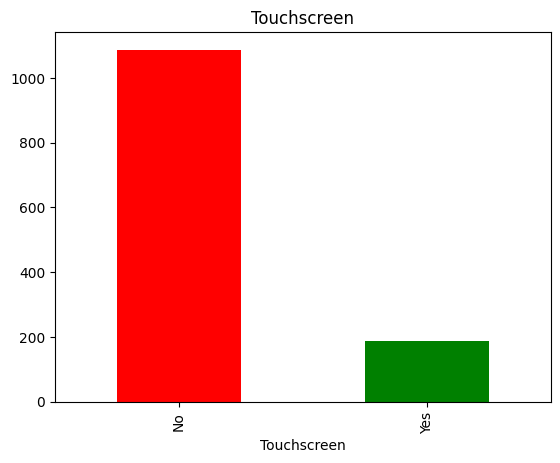

In [ ]:
#Touchscreen
df['Touchscreen'].value_counts().plot(kind = 'bar', title = 'Touchscreen', color =['red','green'])

<Axes: xlabel='Ram'>

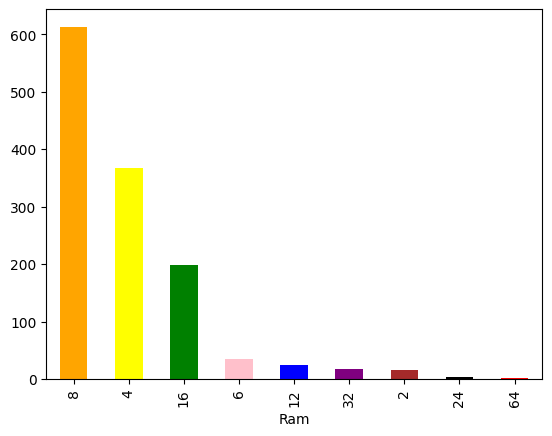

In [ ]:
#Ram
df['Ram'].value_counts().plot(kind='bar', color = ['orange','yellow','green','pink','blue','purple','brown','black','red'])

<Axes: title={'center': 'CPU_company'}, ylabel='count'>

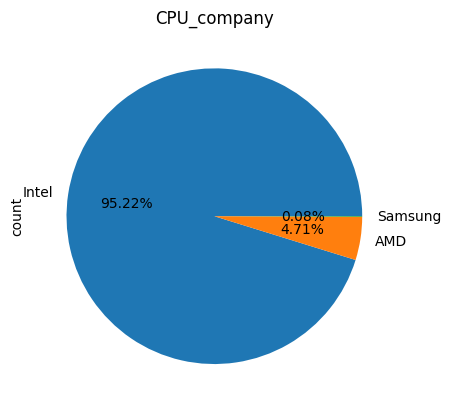

In [ ]:
#CPU_company
df['CPU_company'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'CPU_company')

<Axes: title={'center': 'GPU_company'}, ylabel='count'>

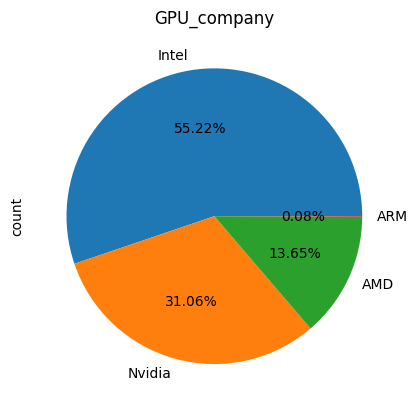

In [ ]:
#GPU_Company
df['GPU_company'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'GPU_company')

<Axes: xlabel='IPSpanel'>

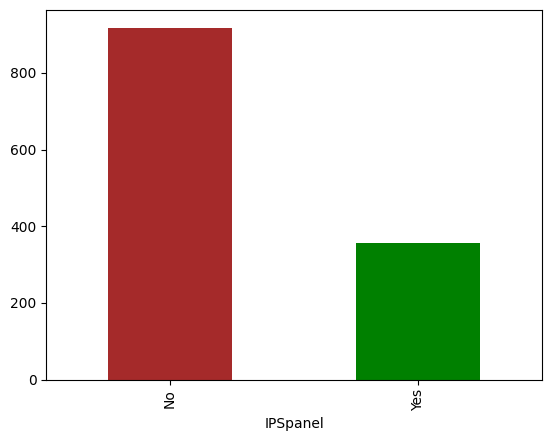

In [ ]:
# IPSpanel
df['IPSpanel'].value_counts().plot(kind='bar', color= ['brown','green'])

<Axes: xlabel='Inches'>

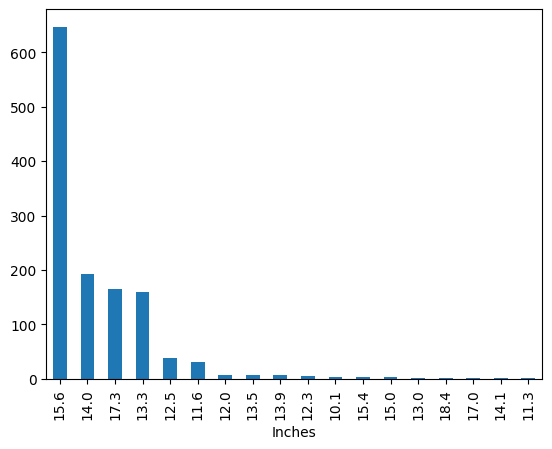

In [ ]:
# Inches
df['Inches'].value_counts().plot(kind='bar')

<Axes: xlabel='PrimaryStorageType'>

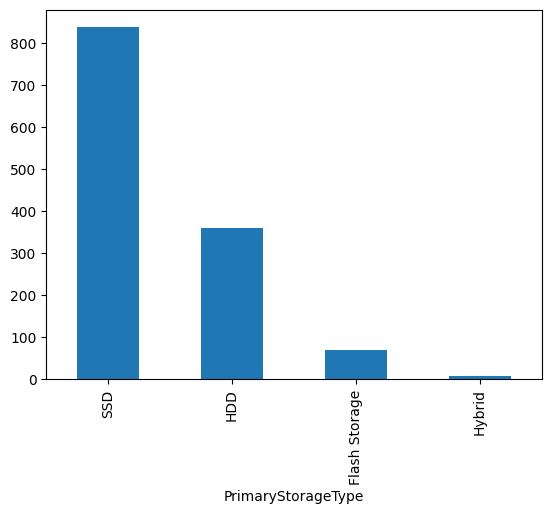

In [ ]:
#PrimaryStorageType
df['PrimaryStorageType'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Screen'}, ylabel='count'>

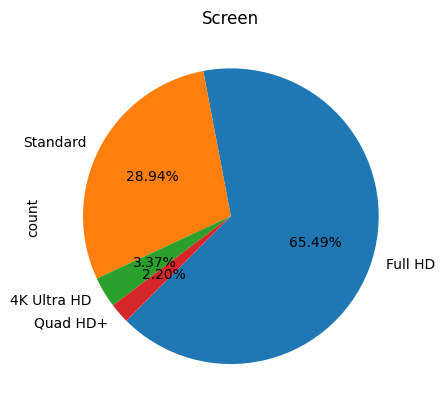

In [ ]:
# Screen
df['Screen'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'Screen', startangle = 225)

<Axes: xlabel='SecondaryStorageType'>

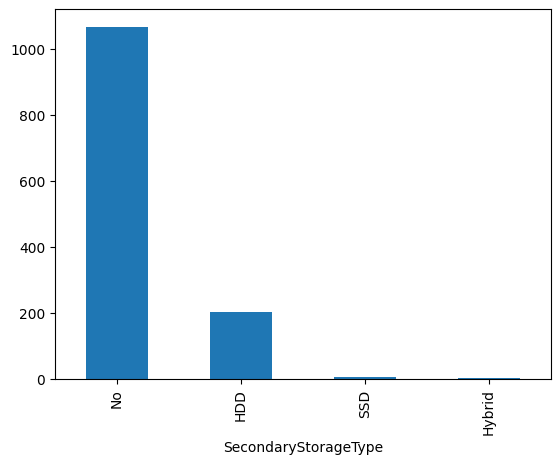

In [ ]:
#SecondaryStorageType
df['SecondaryStorageType'].value_counts().plot(kind='bar')

#### Bivariate Analysis

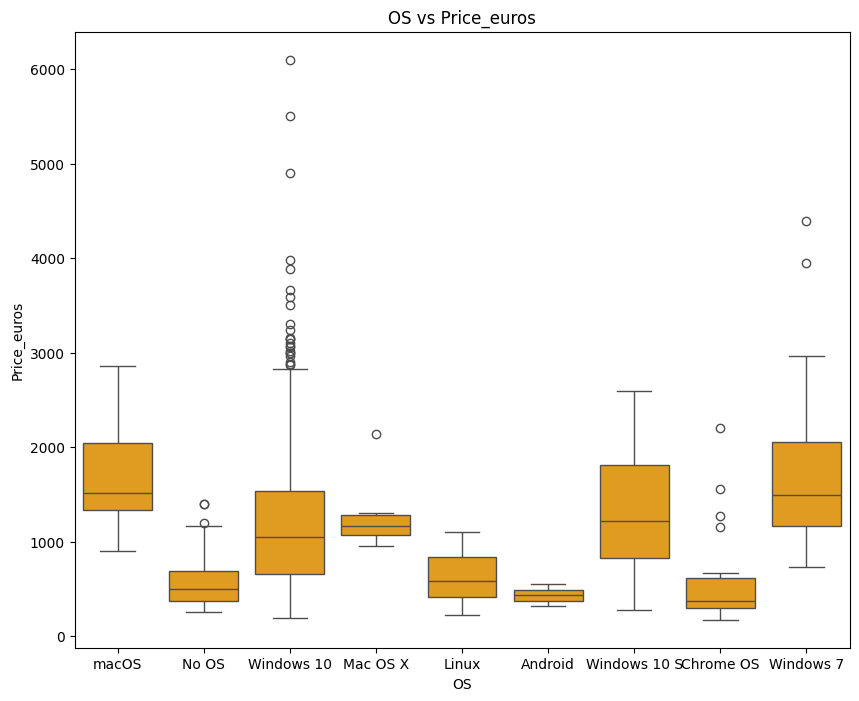

In [ ]:
plt.figure(figsize =(10,8))
sns.boxplot(x= df['OS'], y = df['Price_euros'], color= 'orange')
plt.title('OS vs Price_euros')
plt.show()

In [ ]:
random_colors = np.random.rand(len(df['OS']), 3)  # Generate RGB values

In [ ]:
# Create a dictionary mapping OS to random colors
palette = {os: color for os, color in zip(df['OS'].unique(), random_colors)}

<ipython-input-36-631a4b0bf369>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['OS'], y = df['Price_euros'], palette= palette)


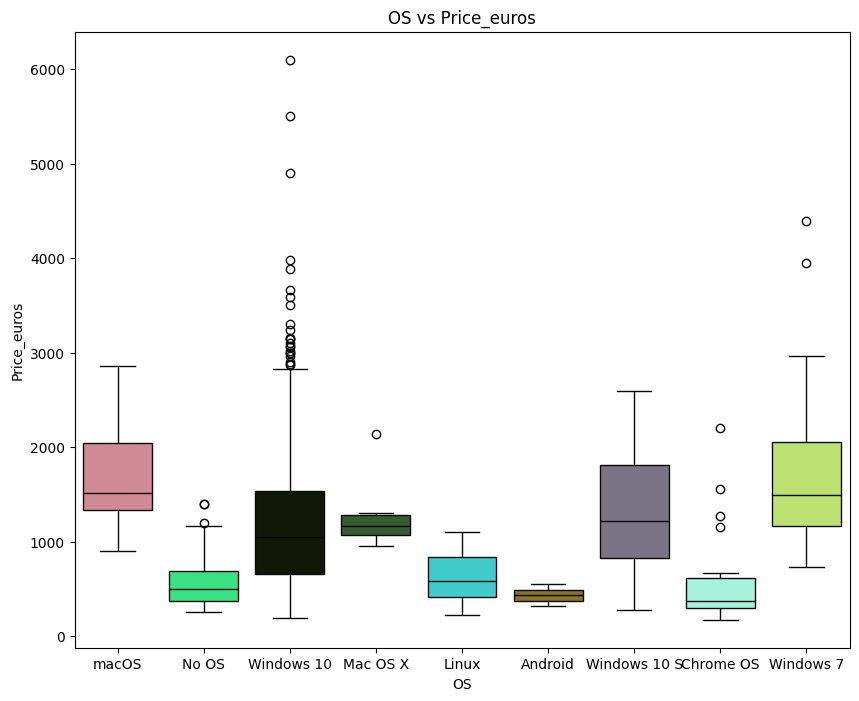

In [ ]:
plt.figure(figsize =(10,8))
sns.boxplot(x= df['OS'], y = df['Price_euros'], palette= palette)
plt.title('OS vs Price_euros')
plt.show()

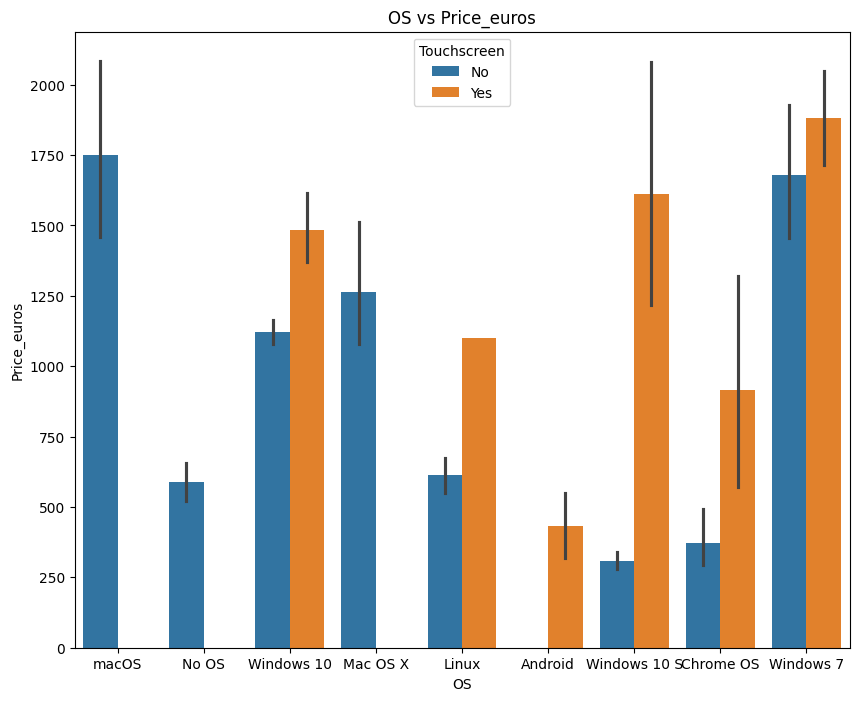

In [ ]:
plt.figure(figsize =(10,8))
sns.barplot(x= df['OS'], y = df['Price_euros'],hue= df['Touchscreen'])
plt.title('OS vs Price_euros')
plt.show()

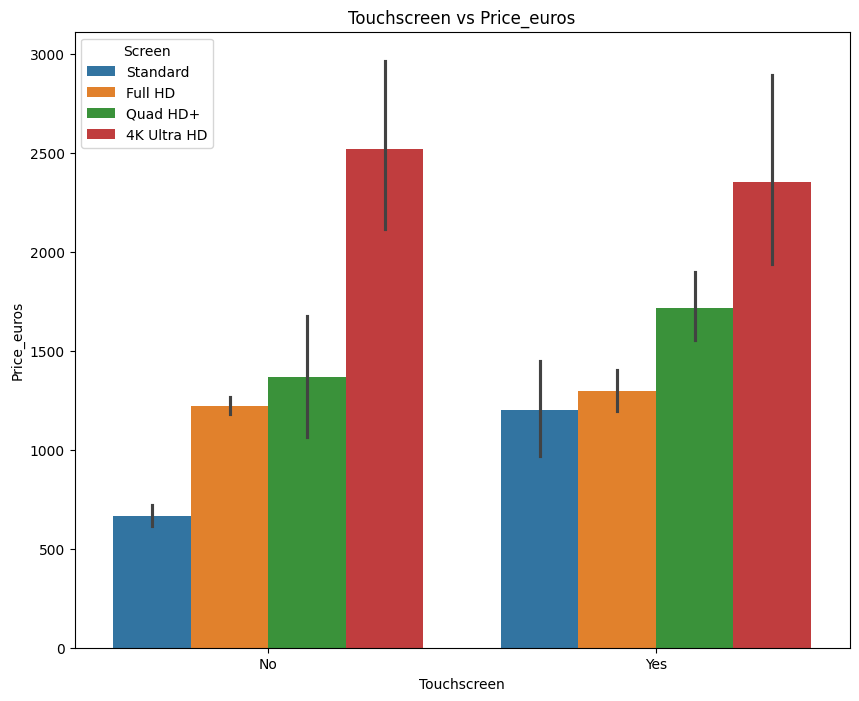

In [ ]:
# random_colors = np.random.rand(len(df['Touchscreen']), 3)

# palette = {ts: color for ts, color in zip(df['Touchscreen'].unique(), random_colors)}

plt.figure(figsize =(10,8))
sns.barplot(x= df['Touchscreen'], y = df['Price_euros'],hue= df['Screen'])
plt.title('Touchscreen vs Price_euros')
plt.show()

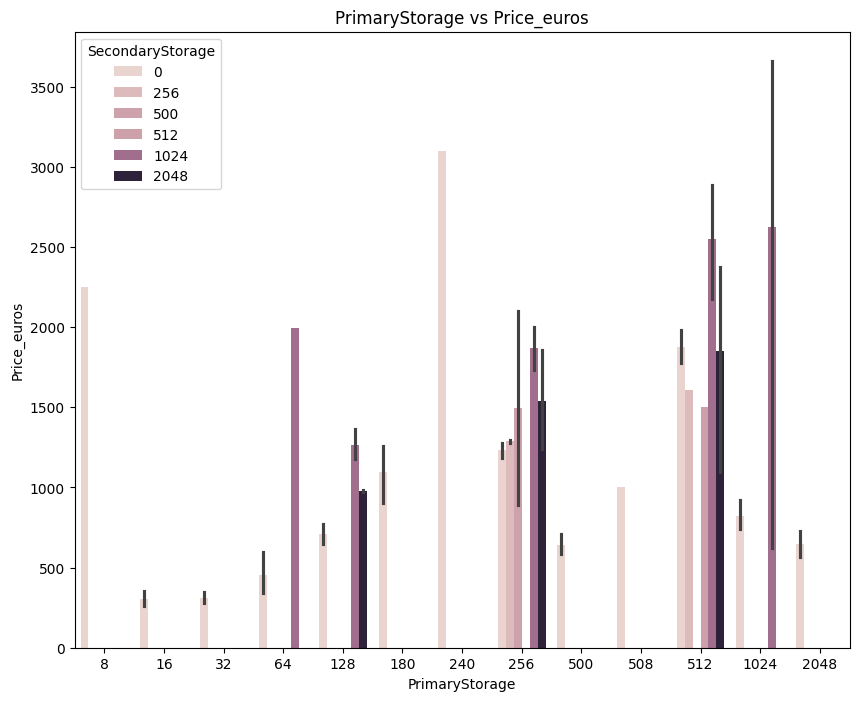

In [ ]:
plt.figure(figsize =(10,8))
sns.barplot(x= df['PrimaryStorage'], y = df['Price_euros'],hue= df['SecondaryStorage'])
plt.title('PrimaryStorage vs Price_euros')
plt.show()

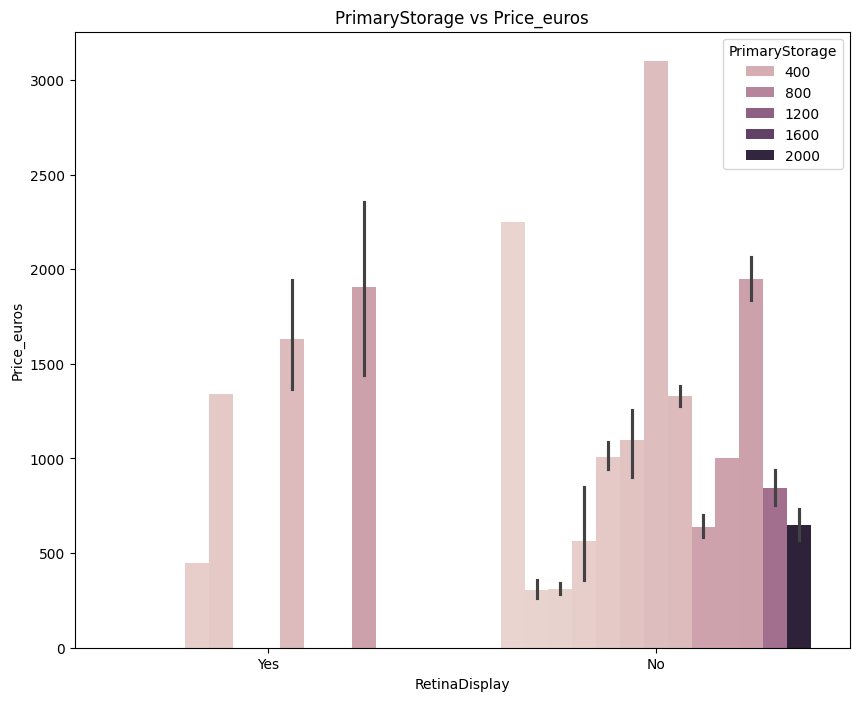

In [ ]:
plt.figure(figsize =(10,8))
sns.barplot(x= df['RetinaDisplay'], y = df['Price_euros'],hue= df['PrimaryStorage'])
plt.title('PrimaryStorage vs Price_euros')
plt.show()

<Axes: xlabel='CPU_freq', ylabel='Ram'>

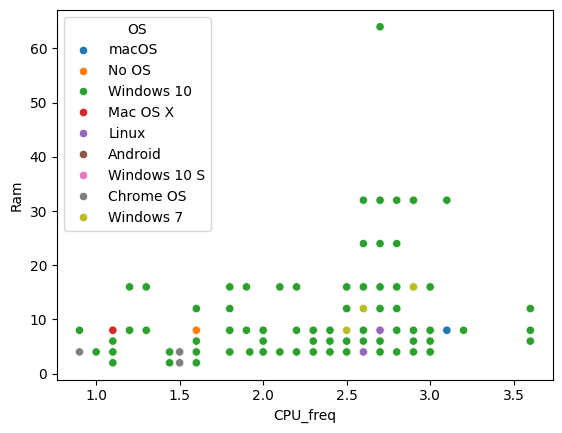

In [ ]:
sns.scatterplot(data = df, x= df['CPU_freq'], y= df['Ram'], hue = df['OS'])

## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Convert Categorical Data to Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
# Using One-Hot Encoding
df = pd.get_dummies(df, columns=['Company','Product','TypeName','OS','Screen','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_model','PrimaryStorageType','SecondaryStorageType','GPU_company','GPU_model'],drop_first= True)

In [ ]:
#Select featues & target
X= df.drop('Price_euros', axis=1)
y= df['Price_euros']

#### train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

#### Train the model

In [ ]:
#using Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Make Predictions

In [ ]:
# prediction on test data price

y_pred = model.predict(X_test)

#### Model Evaluation

In [ ]:
# Using MSE & R squared

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3935205.0204493245


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-Squared :{r2}")

R-Squared :-6.9284578522792


#### Comparison

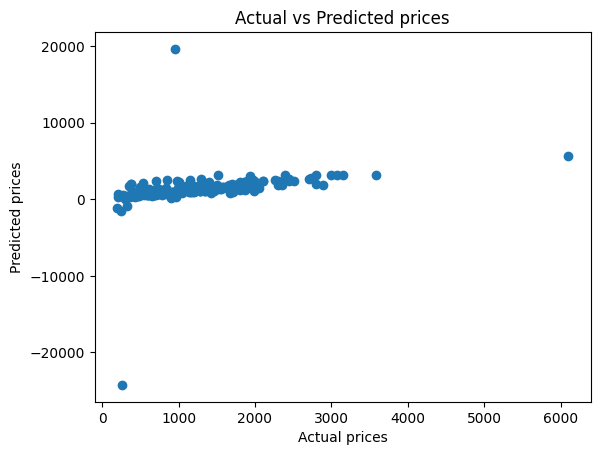

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted prices')

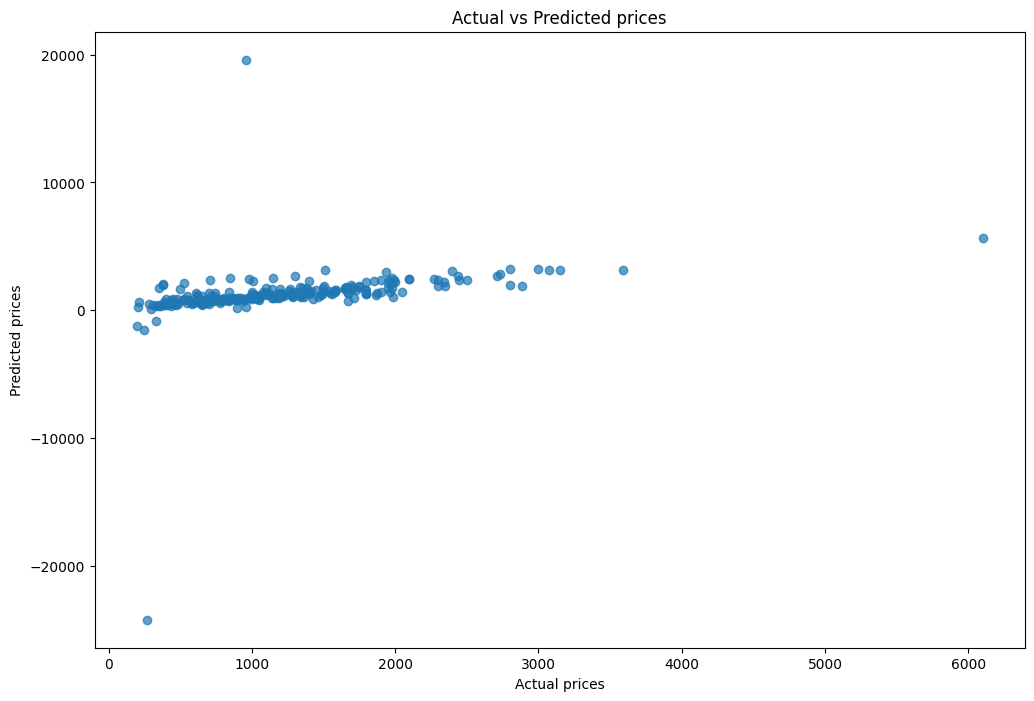

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.7)  # Add transparency
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

 *Looking into above chart we got almost close prices prediction*

***## END of Project***